## TASK 1: DATA PREPARATION AND CUSTOMER ANALYTICS

# Exploratory Data Analysis

In [123]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta

In [125]:
transaction = pd.read_excel(r"D:\DATA ANALYST\Quantium Project\QVI_transaction_data.xlsx")

In [ ]:
transaction.head(10)

In [ ]:
transaction.info()

In [128]:
puchase_behavioủr = pd.read_csv(r"D:\DATA ANALYST\Quantium Project\QVI_purchase_behaviour.csv")

In [ ]:
puchase_behavioủr.head()

In [ ]:
puchase_behavioủr.info()

In [131]:
#  Join 2 dataset
transactionData = transaction.merge(puchase_behavioủr,on= 'LYLTY_CARD_NBR', how = 'left')

In [ ]:
transactionData

In [133]:
# Change columns name
col = ['Date','Store_Number','Loyal_ID','Transaction_ID','Product_ID','Product_Name','Product_Quantity','Total_Sales','Life_Stage','Premium_Customer']
transactionData.columns= col

In [ ]:
# Check data in columns 'Product_Name"
sorted(transactionData['Product_Name'].unique())

In [ ]:
# Replace worth brand_name
transactionData['Product_Name'] = transactionData['Product_Name'].replace(
    {
        'Infzns Crn Crnchers Tangy Gcamole': 'Infuzions Corn Crunchers Tangy Guacamole',
        'Infzns Corn Cornchers Tangy Gcamole 110g':'Infuzions Corn Crunchers Tangy Guacamole 110g',
        'Dorito Corn Chp     Supreme 380g': 'Doritos Corn Chip   Supreme 380g',
        'Dorito Corn Chipss     Supreme 380g': 'Doritos Corn Chipss     Supreme 380g',
        'GrnWves Plus Btroot & Chilli Jam 180g': 'Grain Waves Plus Btroot & Chilli Jam 180g',
        'Snbts Whlgrn Crisps Cheddr&Mstrd 90g': 'Sunbites Wholegrain Crisps Cheddar & Mustard 90g',
        'Smith Crinkle Cut   Mac N Cheese 150g': 'Smiths Crinkle Cut Mac N Cheese 150g',
        'Smith Crinkle Cut   Bolognese 150g': 'Smiths Crinkle Cut   Bolognese 150g',
        'Infzns Corn Cornchers Tangy Gcamole 110g':'Infuzions Corn Crunchers Guacamole 110g'
    },
    regex=True
)


In [136]:
#  Replace worth words
def replaceWords(string):
    # specific
    string = re.sub(r"SeaSalt", "Sea Salt", string)
    string = re.sub(r"Frch/Onin", "French Onion", string)
    string = re.sub(r"Cheddr Mstrd", "Cheddar Mustard", string)
    string = re.sub(r"Jlpno Chili", "Jalapeno Chilli", string)
    string = re.sub(r"Swt/Chlli Sr/Cream", "Sweet Chilli Sour Cream", string)
    string = re.sub(r"SourCream", "Sour Cream", string)
    string = re.sub(r"Tmato Hrb Spce", "Tomato Herb Spice", string)
    string = re.sub(r"S/Cream", "Sour Cream", string)
    string = re.sub(r"ChipsFeta", "Chips Feta", string)
    string = re.sub(r"ChpsHny", "Chips Honey", string)
    string = re.sub(r"FriedChicken", "Fried Chicken", string)
    string = re.sub(r"OnionDip", "Onion Dip", string)
    string = re.sub(r"SweetChili", "Sweet Chilli", string)
    string = re.sub(r"PotatoMix", "Potato Mix", string)
    string = re.sub(r"Seasonedchicken", "Seasoned Chicken", string)
    string = re.sub(r"CutSalt/Vinegr", "Cut Salt Vinegar", string)
    string = re.sub(r"ChpsBtroot", "Chips Beetroot", string)
    string = re.sub(r"ChipsBeetroot", "Chips Beetroot", string)
    string = re.sub(r"ChpsFeta", "Chips Feta", string)
    string = re.sub(r"OnionStacked", "Onion Stacked", string)
    string = re.sub(r"Ched", "Cheddar", string)
    string = re.sub(r"Strws", "Straws", string)
    string = re.sub(r"Slt", "Salt", string)
    string = re.sub(r"Chikn", "Chicken", string)
    string = re.sub(r"Rst", "Roast", string)
    string = re.sub(r"Vinegr", "Vinegar", string)
    string = re.sub(r"Mzzrlla", "Mozzarella", string)
    string = re.sub(r"Originl", "Original", string)
    string = re.sub(r"saltd", "Salted", string)
    string = re.sub(r"Swt", "Sweet", string)
    string = re.sub(r"Chli", "Chilli", string)
    string = re.sub(r"Hony", "Honey", string)
    string = re.sub(r"Chckn", "Chicken", string)
    string = re.sub(r"Chp", "Chips", string)
    string = re.sub(r"Chip", "Chips", string)
    string = re.sub(r"Btroot", "Beetroot", string)
    string = re.sub(r"Chs", "Cheese", string)
    string = re.sub(r"Crm", "Cream", string)
    string = re.sub(r"Orgnl", "Original", string)
    string = re.sub(r"Swt ChliS/Cream", "Sweet Chilli Sour Cream", string)
    string = re.sub(r"SnagSauce", "Snag Sauce", string)
    string = re.sub(r"Compny", "Company", string)
    string = re.sub(r"HoneyJalapeno", "Honey Jalapeno", string)
    string = re.sub(r"Sweetspcy", "Sweet Spicy", string)
    string = re.sub(r"BeetrootRicotta", "Beetroot Ricotta", string)
    string = re.sub(r"Crn", "Corn", string)
    string = re.sub(r"Crnchers", "Crunchers", string)
    string = re.sub(r"CreamHerbs", "CreamHerbs", string)
    string = re.sub(r"Tmato", "Tomato", string)
    string = re.sub(r"BBQMaple", "Berbeque Maple", string)
    string = re.sub(r"BBQ", "Berbeque", string)
    string = re.sub(r"Sthrn", "Southern", string)
   
    return string
transactionData['Product_Name'] = [replaceWords(s) for s in transactionData['Product_Name']]



In [ ]:
# Recheck Data
sorted(transactionData['Product_Name'].unique())

In [138]:
# Danh sách các Brand_Name
brand_names = [
    'Burger Rings', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos', 'French Fries', 
    'Grain Waves', 'Infuzions', 'Kettle', 'NCC', 'Natural Chips', 'Old El Paso', 
    'Pringles', 'RRD', 'Red Rock Deli', 'Smiths', 'Sunbites', 'Thins', 'Tostitos', 
    'Twisties', 'Tyrrells', 'WW', 'Woolworths'
]

# Hàm để tách Brand_Name, Product và Packet_Size
def extract_details(product_name):
    # Tìm Packet_Size sử dụng regex
    match = re.search(r'\d+(?:[A-Za-z]*|\s*)\d*g', product_name, re.IGNORECASE)
    if match:
        packet_size = match.group(0).strip()
        # Loại bỏ Packet_Size và dọn dẹp khoảng trắng
        name_part = re.sub(r'\s*\d+(?:[A-Za-z]*|\s*)\d*g', '', product_name).strip()
        
        # Tìm Brand_Name trong name_part
        for brand in brand_names:
            if name_part.startswith(brand):
                brand_name = brand
                product = name_part[len(brand):].strip()
                return pd.Series([brand_name, product, packet_size], index=['Brand_Name', 'Product', 'Packet_Size'])
        
        # Nếu không tìm thấy Brand_Name, sử dụng toàn bộ name_part là Brand_Name
        return pd.Series([name_part, '', packet_size], index=['Brand_Name', 'Product', 'Packet_Size'])
    else:
        # Nếu không tìm thấy Packet_Size, coi toàn bộ là Brand_Name
        return pd.Series([product_name.strip(), '', ''], index=['Brand_Name', 'Product', 'Packet_Size'])


# Áp dụng hàm để tạo các cột mới
transactionData[['Brand_Name', 'Product', 'Packet_Size']] = transactionData['Product_Name'].apply(extract_details)


In [ ]:
sorted(transactionData['Brand_Name'].unique())

In [140]:
base_date = datetime(1899, 12, 30)
def convert_to_date(days):
    return base_date + timedelta(days=days)

transactionData['Date'] = transactionData['Date'].apply(convert_to_date)

In [141]:
transactionData['Packet_Size'] = transactionData['Packet_Size'].str.replace('G', 'g')

In [142]:
transactionData.head()

,Date,Store_Number,Loyal_ID,Transaction_ID,Product_ID,Product_Name,Product_Quantity,Total_Sales,Life_Stage,Premium_Customer,Brand_Name,Product,Packet_Size
0,2018-10-17,1,1000,1,5,Natural Chips Company Sea Salt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chips,Company Sea Salt,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,Nacho Cheese,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chipss Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,Crinkle Cut Chipss Chicken,170g
3,2018-08-17,2,2373,974,69,Smiths Chips Thinly Sour Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,Chips Thinly Sour Cream&Onion,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chipss Honey&Jalapeno Chilli 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,Tortilla Chipss Honey&Jalapeno Chilli,150g


In [143]:
transactionData.describe()

,Date,Store_Number,Loyal_ID,Transaction_ID,Product_ID,Product_Quantity,Total_Sales
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [144]:
transactionData[transactionData['Product_Quantity'] == 200]

,Date,Store_Number,Loyal_ID,Transaction_ID,Product_ID,Product_Name,Product_Quantity,Total_Sales,Life_Stage,Premium_Customer,Brand_Name,Product,Packet_Size
69762,2018-08-19,226,226000,226201,4,Doritos Corn Chips Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Doritos,Corn Chips Supreme,380g
69763,2019-05-20,226,226000,226210,4,Doritos Corn Chips Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Doritos,Corn Chips Supreme,380g


In [145]:
transactionData[transactionData['Loyal_ID'] == 226000]

,Date,Store_Number,Loyal_ID,Transaction_ID,Product_ID,Product_Name,Product_Quantity,Total_Sales,Life_Stage,Premium_Customer,Brand_Name,Product,Packet_Size
69762,2018-08-19,226,226000,226201,4,Doritos Corn Chips Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Doritos,Corn Chips Supreme,380g
69763,2019-05-20,226,226000,226210,4,Doritos Corn Chips Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Doritos,Corn Chips Supreme,380g


Xem xét thấy giá trị max của "Produc_Quanlity" quá lớn so với trung bình là 200, ta lọc các giao dịch có số lượng sản phẩm mua là 200 thấy chỉ có khách hàng có "Loyal_ID" là 226000. Sét bộ dữ liệu phân tích dữ liệu giao dịch bán lẽ, thế nên ta loại bó khách hàng trên mua hàng với mục đích thương mại.

In [147]:
transactionData = transactionData[transactionData['Loyal_ID'] != 226000]

In [148]:
transactionData.describe()

,Date,Store_Number,Loyal_ID,Transaction_ID,Product_ID,Product_Quantity,Total_Sales
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:52:10.292938240,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241


In [149]:
transactionData['Date'].unique()

<DatetimeArray>
['2018-10-17 00:00:00', '2019-05-14 00:00:00', '2019-05-20 00:00:00',
 '2018-08-17 00:00:00', '2018-08-18 00:00:00', '2019-05-19 00:00:00',
 '2019-05-16 00:00:00', '2018-08-20 00:00:00', '2019-05-17 00:00:00',
 '2019-05-18 00:00:00',
 ...
 '2019-01-23 00:00:00', '2019-04-22 00:00:00', '2019-06-14 00:00:00',
 '2019-01-11 00:00:00', '2018-09-03 00:00:00', '2018-11-21 00:00:00',
 '2019-05-10 00:00:00', '2018-12-08 00:00:00', '2019-01-30 00:00:00',
 '2019-02-09 00:00:00']
Length: 364, dtype: datetime64[ns]

Xét bộ dữ liệu theo chiều thời gian, có thế thấy bộ dữ liệu bị thiếu 1 ngày giao dịch. Kiểm tra ngày thiếu bằng cách tạo biểu đồ số lượng giao dịch theo thời gian từ 01/07/2018 đến 30/06/2019. 

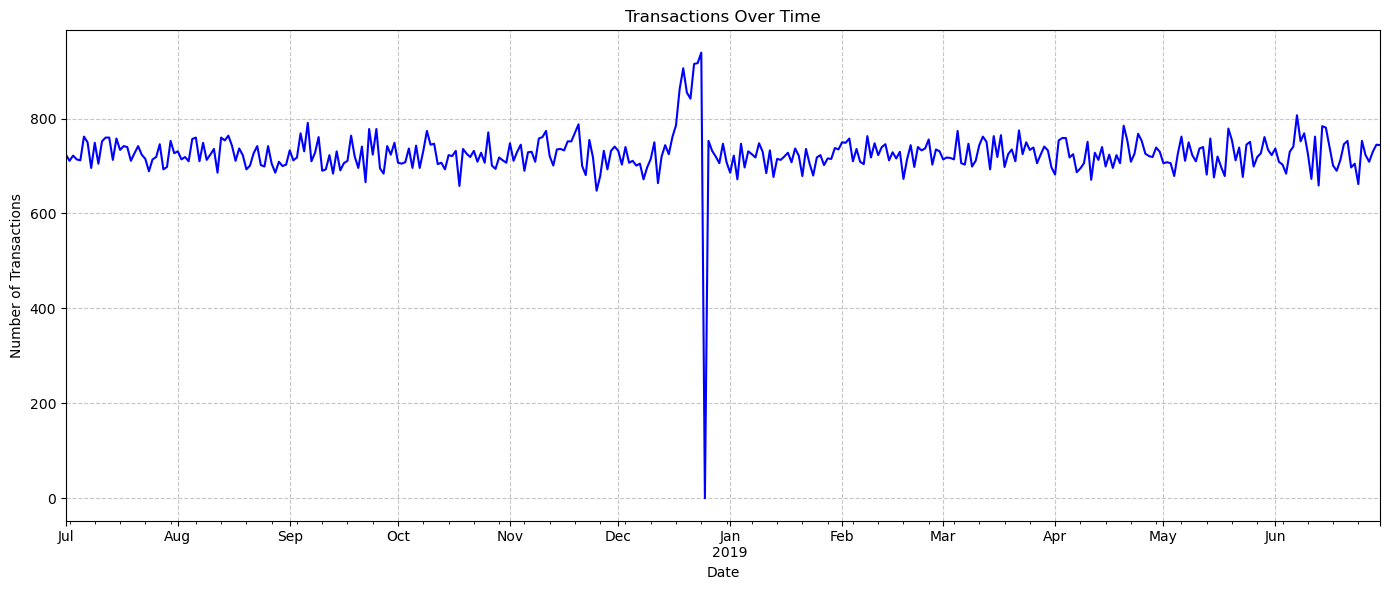

In [151]:
# Tạo dãy ngày và đếm giao dịch theo ngày
all_dates = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')
transactions_by_day = transactionData.groupby('Date').size().reindex(all_dates, fill_value=0)

# Vẽ đồ thị
plt.figure(figsize=(14, 6))
transactions_by_day.plot(kind='line', color='blue', title='Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

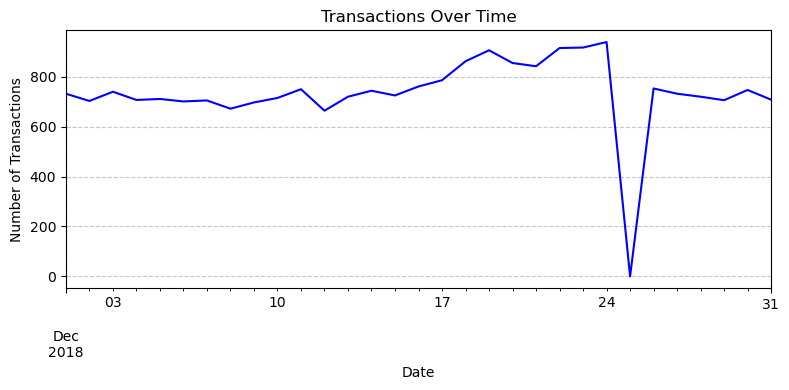

In [152]:
#Tạo dãy ngày và đếm giao dịch trong tháng 12
range_date = pd.date_range(start='2018-12-01', end='2018-12-31', freq='D')
transactions_by_day = transactionData.groupby('Date').size().reindex(range_date, fill_value=0)

# Vẽ đồ thị
plt.figure(figsize=(8, 4))
transactions_by_day.plot(kind='line', color='blue', title='Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [153]:
transactions_by_day.describe

<bound method NDFrame.describe of 2018-12-01    732
2018-12-02    703
2018-12-03    740
2018-12-04    707
2018-12-05    711
2018-12-06    701
2018-12-07    705
2018-12-08    672
2018-12-09    697
2018-12-10    715
2018-12-11    750
2018-12-12    664
2018-12-13    720
2018-12-14    744
2018-12-15    725
2018-12-16    761
2018-12-17    786
2018-12-18    862
2018-12-19    906
2018-12-20    855
2018-12-21    842
2018-12-22    915
2018-12-23    917
2018-12-24    939
2018-12-25      0
2018-12-26    753
2018-12-27    732
2018-12-28    720
2018-12-29    706
2018-12-30    747
2018-12-31    708
Freq: D, dtype: int64>

Khi đếm số lượng giao dịch trong khoảng thời gian 1 năm  của bộ dữ liệu, có thể thấy ngày 25 (ngày Noel) có số lượng giao dịch bằng 0. Điều này là do vào ngày giáng sinh các của hàng đóng cửa. Ngoài ra, ta cũng có thể thấy số lượng giao dịch của các của hàng tăng lên đáng kể vào trước giáng sinh 2 tuần.

In [155]:
transactionData.to_excel(r"D:\DATA ANALYST\Quantium Project\Final_Data.xlsx",index = False)

# DATA ANALYSIS ON SALES

## Revenue/ Quantity by time

Total Sales and Quantity sold

In [159]:
# Toltal Revenue 
total_revenue = transactionData['Total_Sales'].sum()
total_revenue

1933115.0000000002

In [160]:
# Total Quantity
total_qty = transactionData['Product_Quantity'].sum()
total_qty

504724

In [161]:
# Revenue and quantity by month 
transactionData['Year'] = transactionData['Date'].dt.year
transactionData['Month'] = transactionData['Date'].dt.month
revenue_qty_by_month = transactionData.groupby(['Year','Month'])[['Total_Sales','Product_Quantity']].sum().reset_index()
revenue_qty_by_month

C:\Users\PC\AppData\Local\Temp\ipykernel_27604\3039279939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionData['Year'] = transactionData['Date'].dt.year
C:\Users\PC\AppData\Local\Temp\ipykernel_27604\3039279939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionData['Month'] = transactionData['Date'].dt.month


,Year,Month,Total_Sales,Product_Quantity
0,2018,7,165275.30,43242
1,2018,8,158081.05,41284
2,2018,9,160522.00,41792
3,2018,10,164415.70,42821
4,2018,11,160233.70,41895
5,2018,12,167913.40,43845
6,2019,1,162642.30,42501
7,2019,2,150665.00,39220
8,2019,3,166265.20,43347
9,2019,4,159845.10,41825


In [162]:
# Revenue and quantity by quarter
revenue_qty_by_quarter = revenue_qty_by_month.copy()
def get_quarter(month):
    if month in [7, 8, 9]:
        return 'Q1'
    elif month in [10, 11, 12]:
        return 'Q2'
    elif month in [1, 2, 3]:
        return 'Q3'
    elif month in [4, 5, 6]:
        return 'Q4'
revenue_qty_by_quarter['Quarter'] = revenue_qty_by_quarter['Month'].apply(get_quarter)
sum_mean_revenue_qty_quarter = revenue_qty_by_quarter.groupby('Quarter').agg(
        revenue=('Total_Sales', 'sum'),
        mean_revenue=('Total_Sales', 'mean'),
        total_qty=('Product_Quantity', 'sum')
    ).sort_values(by='Quarter', ascending=True).reset_index()
sum_mean_revenue_qty_quarter

,Quarter,revenue,mean_revenue,total_qty
0,Q1,483878.35,161292.783333,126318
1,Q2,492562.80,164187.600000,128561
2,Q3,479572.50,159857.500000,125068
3,Q4,477101.35,159033.783333,124777


In [163]:
# Qúy 1 và 2 có doanh thu cao hơn so với 2 quý còn lại, đặc biệt là quý 2 thời gian cuối năm

In [164]:
month_percent = revenue_qty_by_month['Total_Sales']/total_revenue
quarter_percent = sum_mean_revenue_qty_quarter['revenue']/total_revenue
quarter_percent = pd.DataFrame(quarter_percent)
quarter_percent

,revenue
0,0.250310
1,0.254803
2,0.248083
3,0.246804


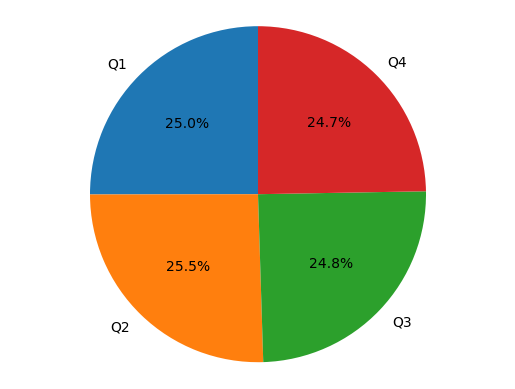

In [165]:
# Chuẩn bị dữ liệu từ sum_mean_revenue_qty_quarter
labels = sum_mean_revenue_qty_quarter['Quarter']  
sizes = sum_mean_revenue_qty_quarter['total_qty']  
fig, ax = plt.subplots()
# Vẽ biểu đồ hình tròn (pie)
ax.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
ax.axis('equal')
plt.show()


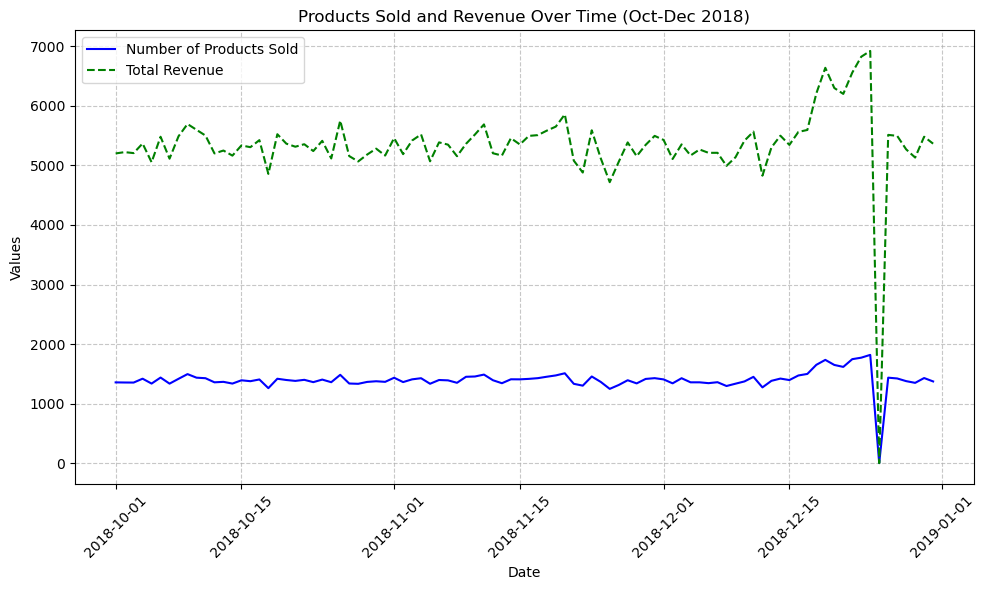

In [166]:
# Tạo dãy ngày từ tháng 10 đến tháng 12
range_date = pd.date_range(start='2018-10-01', end='2018-12-31', freq='D')

# Tính số lượng sản phẩm bán ra và doanh thu theo ngày
products_sold_by_day = transactionData.groupby('Date')['Product_Quantity'].sum().reindex(range_date, fill_value=0)
revenue_by_day = transactionData.groupby('Date')['Total_Sales'].sum().reindex(range_date, fill_value=0)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(products_sold_by_day.index, products_sold_by_day, label='Number of Products Sold', color='blue')
plt.plot(revenue_by_day.index, revenue_by_day, label='Total Revenue', color='green', linestyle='--')
plt.title('Products Sold and Revenue Over Time (Oct-Dec 2018)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [167]:
transactions_by_day.describe()

count     31.000000
mean     736.612903
std      157.057458
min        0.000000
25%      706.500000
50%      732.000000
75%      773.500000
max      939.000000
dtype: float64

In [168]:
revenue_by_day.describe()

count      92.000000
mean     5353.943478
std       684.708931
min         0.000000
25%      5166.975000
50%      5352.650000
75%      5503.575000
max      6923.000000
Name: Total_Sales, dtype: float64

In [169]:
# Lọc dữ liệu trong khoảng thời gian từ 10/12/2018 đến 24/12/2018
date_range_data = transactionData[(transactionData['Date'] >= '2018-12-10') & (transactionData['Date'] <= '2018-12-24')]

# Tính tổng số sản phẩm bán ra và doanh thu trong khoảng thời gian này
total_products_sold_in_range = date_range_data.groupby('Date')['Product_Quantity'].sum().sum()
total_revenue_in_range = date_range_data.groupby('Date')['Total_Sales'].sum().sum()

# Tính trung bình số sản phẩm bán ra và doanh thu hàng ngày trong toàn bộ dữ liệu
average_daily_products_sold = transactionData.groupby('Date')['Product_Quantity'].sum().mean()
average_daily_revenue = transactionData.groupby('Date')['Total_Sales'].sum().mean()

# Tính số ngày trong khoảng thời gian đã lọc (10/12/2018 đến 24/12/2018)
num_days_in_range = (pd.to_datetime('2018-12-24') - pd.to_datetime('2018-12-10')).days + 1  # +1 để tính cả ngày bắt đầu

# Tính phần trăm tăng trưởng so với trung bình, đã nhân với số ngày
product_growth_percentage = ((total_products_sold_in_range - average_daily_products_sold * num_days_in_range) / (average_daily_products_sold * num_days_in_range)) * 100
revenue_growth_percentage = ((total_revenue_in_range - average_daily_revenue * num_days_in_range) / (average_daily_revenue * num_days_in_range)) * 100

# In kết quả
print(f"Product Growth Percentage: {product_growth_percentage:.2f}%")
print(f"Revenue Growth Percentage: {revenue_growth_percentage:.2f}%")


Product Growth Percentage: 11.76%
Revenue Growth Percentage: 11.44%


Sau khi thực hiện phân tích doanh thu, ta thấy doanh thu/ số lượng sản phẩm bán ra qua các quý 3, 4, 1 không có sự giao động đáng kể. Tuy nhiên ở quý 2, chỉ số doanh thu và tổng số lượng sản phẩm bán ra tăng đáng kể, đặc biết là trong khoảng thời gian 2 tuần trước giáng sinh. Chỉ số doanh thu tăng 11.44% so với doanh thu trung bình và chỉ số số lượng sản phẩm bán ra tăng 11.74% so với trung bình trong 2 tuần trước giáng sinh.

## Revenue by Brand Name, Size anb Store

In [172]:
def sum_mean_revenue_qty(*columns):
    sum_mean_revenue_qty = transactionData.groupby(list(columns)).agg(
        revenue=('Total_Sales', 'sum'),
        mean_revenue=('Total_Sales', 'mean'),
        total_qty=('Product_Quantity', 'sum')
    ).sort_values(by='revenue', ascending=False).reset_index()

    return sum_mean_revenue_qty

In [173]:
brand_rev_qty = sum_mean_revenue_qty('Brand_Name')
brand_rev_qty
# Doanh thu, doanh thu trung bình cho mỗi đơn hàng và tổng số lượng sản phẩm bán của các Brand Name

,Brand_Name,revenue,mean_revenue,total_qty
0,Kettle,390239.8,9.451652,79051
1,Doritos,240590.9,8.548264,53816
2,Smiths,224660.2,7.059680,60339
3,Pringles,177655.5,7.077344,48019
4,Infuzions,99047.6,6.974692,27119
5,Old El Paso,90785.1,9.736712,17805
6,Thins,88852.5,6.312789,26929
7,Twisties,81522.1,8.623027,18118
8,Tostitos,79789.6,8.424623,18134
9,Cobs,70569.8,7.280491,18571


In [174]:
brand_rev_qty.describe()

,revenue,mean_revenue,total_qty
count,24.000000,24.000000,24.000000
mean,80546.458333,6.425353,21030.166667
std,92318.187464,1.964415,19860.299804
min,6831.000000,3.032252,2643.000000
25%,17780.300000,5.374150,8555.500000
50%,51632.300000,6.490839,16265.500000
75%,89335.650000,8.119125,23607.250000
max,390239.800000,9.736712,79051.000000


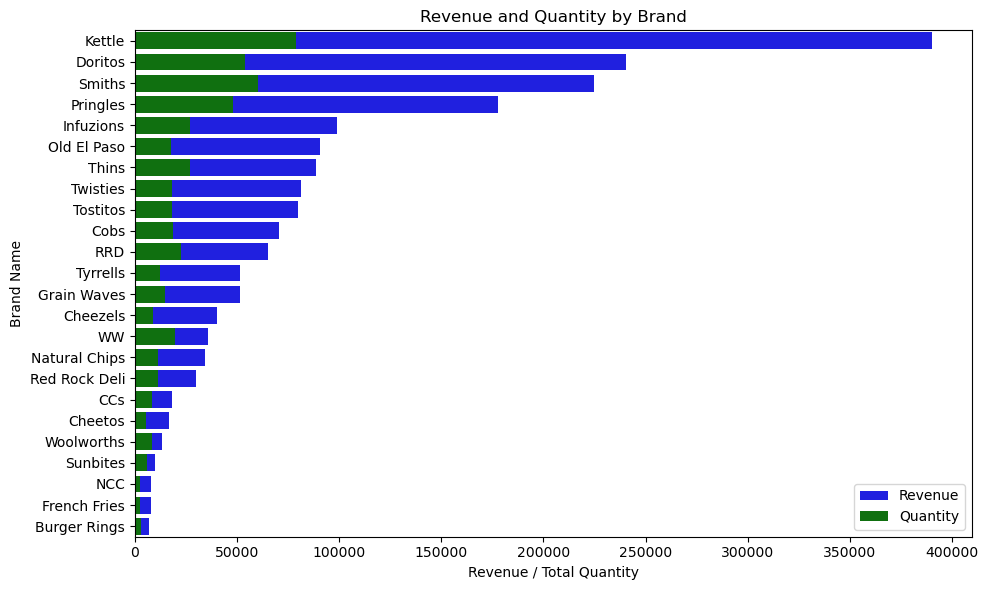

In [175]:
# Thiết lập figure
fig, ax = plt.subplots(figsize=(10, 6))
# Tạo biểu đồ cột cho 'revenue'
sns.barplot(x='revenue', y='Brand_Name', data=brand_rev_qty, color='b', label='Revenue', ax=ax)
# Tạo biểu đồ cột cho 'total_qty'
sns.barplot(x='total_qty', y='Brand_Name', data=brand_rev_qty, color='g', label='Quantity', ax=ax)
# Thiết lập nhãn và tiêu đề
ax.set_xlabel('Revenue / Total Quantity')
ax.set_ylabel('Brand Name')
ax.set_title('Revenue and Quantity by Brand')
# Thêm legend để phân biệt
ax.legend()
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [176]:
size_revenue = sum_mean_revenue_qty('Packet_Size')
size_revenue

,Packet_Size,revenue,mean_revenue,total_qty
0,175g,485437.4,7.311905,126467
1,150g,304288.5,7.054984,82174
2,134g,177655.5,7.077344,48019
3,110g,162765.4,7.270532,42835
4,170g,146673.0,7.339889,38088
5,330g,136794.3,10.908636,23999
6,300g,113330.6,7.472676,28813
7,165g,101360.6,6.626175,29051
8,380g,75419.6,11.754925,12273
9,270g,55425.4,8.818679,12049


In [177]:
size_revenue.describe()

,revenue,mean_revenue,total_qty
count,21.000000,21.000000,21.000000
mean,92053.095238,6.601525,24034.476190
std,119275.971815,2.315109,30960.053407
min,5733.000000,3.216888,2730.000000
25%,10647.600000,4.546782,5673.000000
50%,43048.800000,7.054984,11962.000000
75%,136794.300000,7.472676,29051.000000
max,485437.400000,11.754925,126467.000000


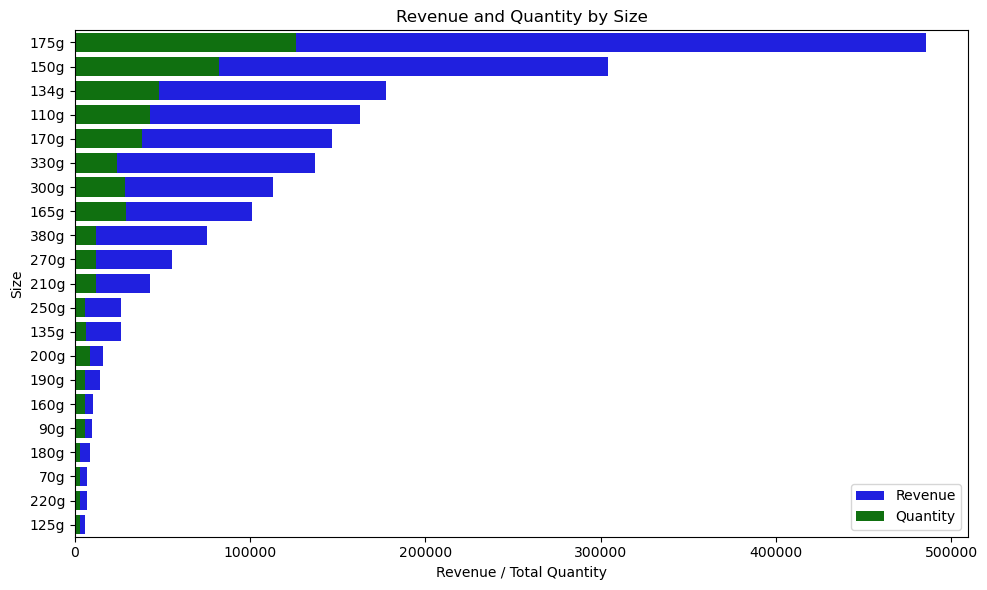

In [178]:
# Thiết lập figure
fig, ax = plt.subplots(figsize=(10, 6))
# Tạo biểu đồ cột cho 'revenue'
sns.barplot(x='revenue', y='Packet_Size', data=size_revenue, color='b', label='Revenue', ax=ax)
# Tạo biểu đồ cột cho 'total_qty'
sns.barplot(x='total_qty', y='Packet_Size', data=size_revenue, color='g', label='Quantity', ax=ax)

# Thiết lập nhãn và tiêu đề
ax.set_xlabel('Revenue / Total Quantity')
ax.set_ylabel('Size')
ax.set_title('Revenue and Quantity by Size')
# Thêm legend để phân biệt
ax.legend()
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [179]:
# Top 20% highest revenue tore
top_20_percent_store = sum_mean_revenue_qty('Store_Number').iloc[0:55,:]
top_20_percent_store

,Store_Number,revenue,mean_revenue,total_qty
0,226,17605.45,8.715569,4001
1,88,16333.25,8.720368,3718
2,165,15973.75,8.781611,3602
3,40,15559.50,8.820578,3499
4,237,15539.50,8.705602,3515
5,58,15251.45,8.750115,3463
6,199,14797.00,8.771191,3343
7,4,14647.65,8.729231,3316
8,203,14551.60,8.760747,3287
9,26,14469.30,8.822744,3256


In [180]:
top_20_percent_store_revenue = top_20_percent_store['revenue'].sum()
top_20_percent_store_revenue

728990.7000000001

In [181]:
percentage_of_revenue = top_20_percent_store['revenue'].sum() / total_revenue *100 
percentage_of_revenue

37.71067422269239

Doanh thu của các thương hiệu Kettle, Dorios, Smiths và Pringles theo thứ tự chi doanh thu cao nhất trên toàn bộ chuổi của hàng. Bên cạnh đó các túi chip loại 175g và 150g có doanh thu và cả số lượng sản phẩm bán ra lần lượt gấp 5 và gấp 3 lần so với mức trung bình.

Bên cạnh đó, số lượng sản phẩm bán ra của thương hiệu Smiths nhiều hơn Doritos sắp xỉ 7.5 % tuy nhiên mang lại doanh thu kém hơn 7.1% so với hãng Doritos. Tương tự các sản phẩm ở top dưới như Thins, RRD, WW có số lượng sản phẩm bán ra cao hơn một số thương hiệu top trên, tuy nhiên đạt doanh thu kém  các thương hiệu top trên 2-4%.

Doanh thu của 20% của hàng có doanh thu hàng đầu đóng góp 37.71% cho toàn bộ doanh thu của chuỗi của hàng.

# Data analysis on customer segments

Revenue by customer segmnets

In [188]:
rev_qty_by_LT_PC = sum_mean_revenue_qty('Life_Stage', 'Premium_Customer')
rev_qty_by_LT_PC = rev_qty_by_LT_PC.pivot_table(index='Life_Stage', columns='Premium_Customer', values=['revenue', 'mean_revenue', 'total_qty'], aggfunc='sum')
rev_qty_by_LT_PC

mean_revenue                         revenue  \
Premium_Customer             Budget Mainstream   Premium     Budget   
Life_Stage                                                            
MIDAGE SINGLES/COUPLES     7.074661   7.647284  7.112056   35514.80   
NEW FAMILIES               7.297321   7.317806  7.231655   21928.45   
OLDER FAMILIES             7.269570   7.262395  7.208079  168363.25   
OLDER SINGLES/COUPLES      7.430315   7.282116  7.449766  136769.80   
RETIREES                   7.443445   7.252262  7.456174  113147.80   
YOUNG FAMILIES             7.287201   7.189025  7.266756  139345.85   
YOUNG SINGLES/COUPLES      6.615624   7.558339  6.629852   61141.60   

                                             total_qty                     
Premium_Customer       Mainstream    Premium    Budget Mainstream Premium  
Life_Stage                                                                 
MIDAGE SINGLES/COUPLES   90803.85   58432.65      9496      22699   15526  
NEW FAMILIES             17013.90   11491.10      5571       4319    2957  
OLDER FAMILIES          103445.55   80658.40     45065      27756   21771  
OLDER SINGLES/COUPLES   133393.80  132263.15     35220      34997   33986  
RETIREES                155677.05   97646.05     28764      40518   24884  
YOUNG FAMILIES           92788.75   84025.50     37111      25044   22406  
YOUNG SINGLES/COUPLES   157621.60   41642.10     16671      38632   11331

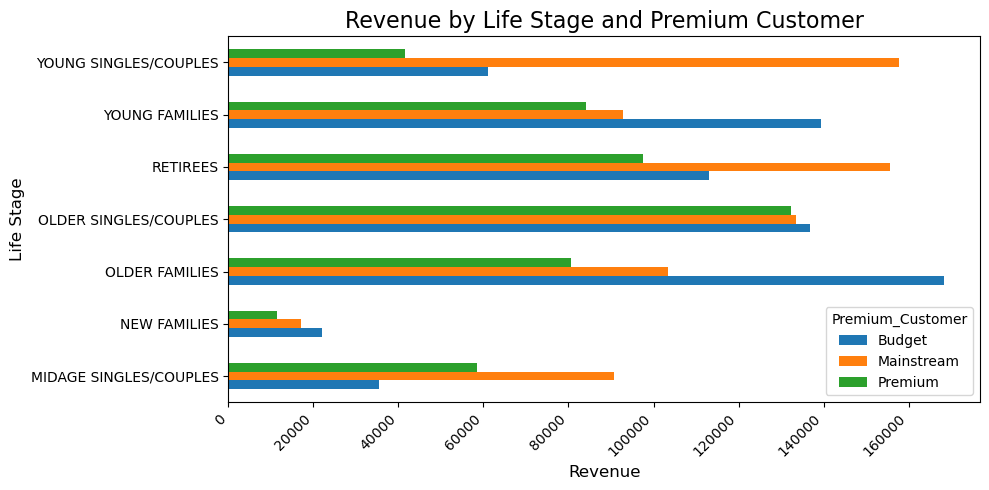

In [189]:
# Tạo bảng pivot chỉ có doanh thu
pivot_table_revenue = rev_qty_by_LT_PC.pivot_table(index='Life_Stage', values='revenue', aggfunc='sum')

# Vẽ biểu đồ cột cho doanh thu
pivot_table_revenue.plot(kind='barh', figsize=(10, 5))

# Cài đặt tiêu đề và nhãn cho biểu đồ
plt.title('Revenue by Life Stage and Premium Customer', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Life Stage', fontsize=12)

# Xoay nhãn của trục X nếu cần
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [190]:
# Tính tỷ lệ phần trăm (doanh thu từng nhóm chia cho tổng doanh thu)
total_sales = pivot_table_revenue.sum().sum()  # Tổng doanh thu của tất cả các nhóm
pivot_data_percent = pivot_table_revenue.div(total_sales, axis=0) * 100  # Tính tỷ lệ phần trăm
pivot_data_percent.reset_index()

Premium_Customer,Life_Stage,Budget,Mainstream,Premium
0,MIDAGE SINGLES/COUPLES,1.837180,4.697281,3.022720
1,NEW FAMILIES,1.134358,0.880129,0.594434
2,OLDER FAMILIES,8.709428,5.351236,4.172457
3,OLDER SINGLES/COUPLES,7.075099,6.900459,6.841970
4,RETIREES,5.853133,8.053171,5.051228
5,YOUNG FAMILIES,7.208358,4.799960,4.346637
6,YOUNG SINGLES/COUPLES,3.162854,8.153762,2.154145


Amount of customer by customer segments

Text(0, 0.5, 'Customer Class')

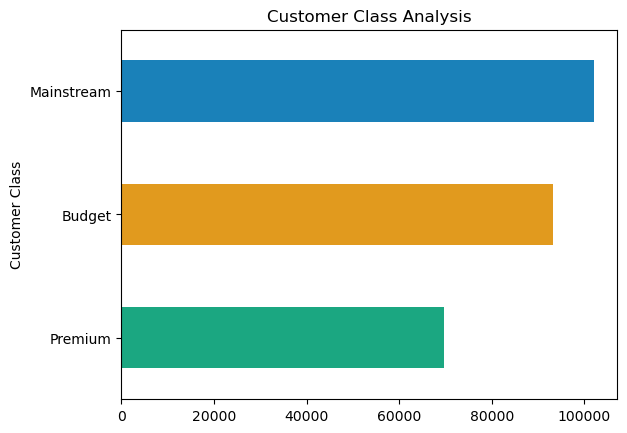

In [192]:
transactionData.Premium_Customer.value_counts().plot(kind='barh', alpha=.9, color=sns.color_palette("colorblind"),title='Customer Class Analysis').invert_yaxis()
plt.ylabel("Customer Class")

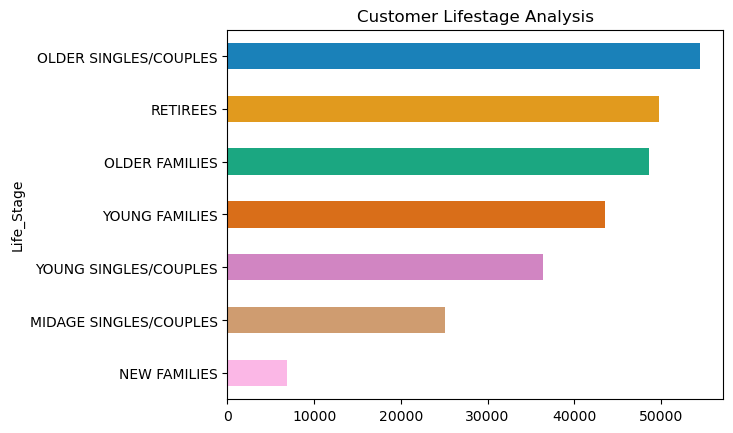

In [193]:
# Customer lifestage counts
transactionData.Life_Stage.value_counts().plot(kind='barh', alpha=.9, color=sns.color_palette("colorblind"), title='Customer Lifestage Analysis').invert_yaxis()

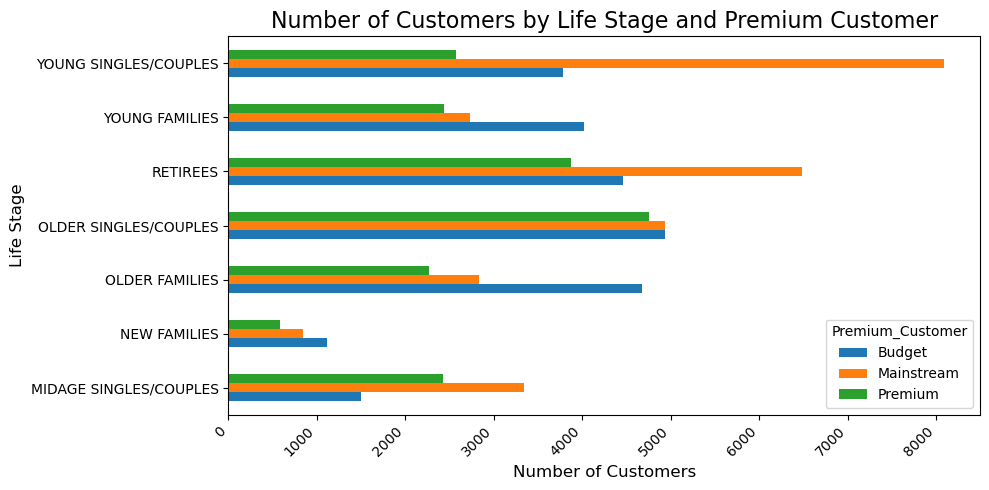

In [194]:
# Tạo bảng pivot để tính tổng số khách hàng duy nhất (Loyal_ID) cho mỗi nhóm Life_Stage và Premium_Customer
pivot_table_customers = pd.pivot_table(transactionData, values='Loyal_ID', index=['Life_Stage'], columns=['Premium_Customer'], aggfunc='nunique')

# Vẽ biểu đồ cột ngang cho số lượng khách hàng
pivot_table_customers.plot(kind='barh', figsize=(10, 5))

# Cài đặt tiêu đề và nhãn cho biểu đồ
plt.title('Number of Customers by Life Stage and Premium Customer', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Life Stage', fontsize=12)

# Xoay nhãn của trục X nếu cần
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [195]:
# Tính tỷ lệ phần trăm (số lượng khách hàng từng nhóm chia tổng khách hàng)
total_sales = pivot_table_customers.sum().sum()  # Tổng doanh thu của tất cả các nhóm
pivot_data_percent = pivot_table_customers.div(total_sales, axis=0) * 100  # Tính tỷ lệ phần trăm
pivot_data_percent.reset_index()

Premium_Customer,Life_Stage,Budget,Mainstream,Premium
0,MIDAGE SINGLES/COUPLES,2.070599,4.598271,3.346825
1,NEW FAMILIES,1.530921,1.168842,0.809516
2,OLDER FAMILIES,6.436202,3.897516,3.129302
3,OLDER SINGLES/COUPLES,6.785891,6.787268,6.539457
4,RETIREES,6.131946,8.919819,5.330690
5,YOUNG FAMILIES,5.530316,3.755713,3.349579
6,YOUNG SINGLES/COUPLES,5.202654,11.134974,3.543697


Doanh thu từ 3 nhóm Budget Older Families, Mainstream Young Singles/ Couple và Mainstreams Retirees chiếm doanh thu nổi bật lần lượt chiếm 8.71 %, 8.15% và 8.05% tổng số doanh thu. Trong khi đó số lượng khách hàng từ 3 nhóm Mainstream Young Singles/ Couple, Mainstreams Retirees và Mainstream Older Singles/ Couple chiếm lần lượt 11.13%, 8.92% và 6.79% tổng số lượng khách hàng. Ngoài ra, nhóm Budget Older Families chiếm 6.44% tổng số lượng khách hàng.

Có thể thấy 2 nhóm Mainstream Young Singles/ Couple, Mainstreams Retirees có số lượng khách hàng đông đảo và cũng đóng góp doanh thu lớn cho chuổi của hàng. Nhóm Budget Older Families không nàm trong Top những phân khúc có số lượng khách hàng cao nhất, tui nhiên lại mang lại tổng lợi nhuận cao nhất trong các nhóm ( Đây là nhóm khách hàng không tốn nhiều chi phí để thu hút khách hàng mới, có tần xuất mua hàng cao, có thể đề ra các chiến dịch để thúc đẩy mua hàng cho nhóm này) 

## Deep dive into specific customer segments for insights

In [199]:

def calculate_affinity(transactionData, life_stage, premium_customer, analysis_field):
    """
    Calculate affinity for a given life stage and premium customer segment based on the specified analysis field.

    Parameters:
        transactionData (pd.DataFrame): The transaction data containing 'Life_Stage', 
                                         'Premium_Customer', 'Product_Quantity', and the specified analysis field.
        life_stage (str): The life stage segment to analyze.
        premium_customer (str): The premium customer segment to analyze.
        analysis_field (str): The column name to analyze affinity for (e.g., 'Brand_Name', 'Category', etc.).

    Returns:
        pd.DataFrame: A DataFrame containing analysis_field, Target_Segment, Other, and Affinity.
    """
    # Filter data for the target segment
    segment = transactionData[
        (transactionData['Life_Stage'] == life_stage) & 
        (transactionData['Premium_Customer'] == premium_customer)
    ]

    # Filter data for the rest of the population
    other = transactionData[
        ~((transactionData['Life_Stage'] == life_stage) & 
          (transactionData['Premium_Customer'] == premium_customer))
    ]

    # Calculate total quantity for the target segment and others
    quantity_segment = segment['Product_Quantity'].sum()
    quantity_other = other['Product_Quantity'].sum()

    # Calculate proportions for the specified analysis field within the target segment
    quantity_segment_by_field = (
        segment.groupby(analysis_field)['Product_Quantity']
        .sum()
        .reset_index()
        .rename(columns={'Product_Quantity': 'Target_Segment'})
    )
    quantity_segment_by_field['Target_Segment'] /= quantity_segment

    # Calculate proportions for the rest of the population
    quantity_other_by_field = (
        other.groupby(analysis_field)['Product_Quantity']
        .sum()
        .reset_index()
        .rename(columns={'Product_Quantity': 'Other'})
    )
    quantity_other_by_field['Other'] /= quantity_other

    # Merge the two dataframes and calculate affinity
    field_proportions = pd.merge(
        quantity_segment_by_field, 
        quantity_other_by_field, 
        on=analysis_field,
        how='left'
    )
    field_proportions['Affinity'] = (
        field_proportions['Target_Segment'] / field_proportions['Other']
    )

    # Sort by affinity in descending order
    field_proportions = field_proportions.sort_values(
        by='Affinity', ascending=False
    )
    
    return field_proportions


In [200]:
# Tính toán cho phân khúc "YOUNG SINGLES/COUPLES" và "Mainstream" theo Brand_Name
result_mainstream_young_singles = calculate_affinity(
    transactionData=transactionData, 
    life_stage="YOUNG SINGLES/COUPLES", 
    premium_customer="Mainstream",
    analysis_field="Brand_Name"
)

# Tính toán cho phân khúc "OLDER FAMILIES" và "Budget" theo Brand_Name
result_budget_older_families = calculate_affinity(
    transactionData=transactionData, 
    life_stage="OLDER FAMILIES", 
    premium_customer="Budget",
    analysis_field="Brand_Name"
)

# Tính toán cho phân khúc "RETIRED" và "Mainstream" theo Brand_Name
result_mainstream_retires = calculate_affinity(
    transactionData=transactionData, 
    life_stage="RETIREES", 
    premium_customer="Mainstream",
    analysis_field="Brand_Name"
)

# Hiển thị kết quả cho phân khúc Mainstream Young Singles
print("Mainstream Young Singles/Couples Affinity:")
print(result_mainstream_young_singles)

# Hiển thị kết quả cho phân khúc Budget Older Families
print("Budget Older Families Affinity:")
print(result_budget_older_families)

# Hiển thị kết quả cho phân khúc Mainstream Retirees
print("Mainstream Retirees Affinity:")
print(result_mainstream_retires)


Mainstream Young Singles/Couples Affinity:
       Brand_Name  Target_Segment     Other  Affinity
21       Tyrrells        0.029587  0.023933  1.236235
20       Twisties        0.043306  0.035283  1.227401
9          Kettle        0.185649  0.154216  1.203823
19       Tostitos        0.042581  0.035377  1.203638
12    Old El Paso        0.041598  0.034753  1.196958
13       Pringles        0.111980  0.093743  1.194536
5         Doritos        0.122877  0.105277  1.167176
4            Cobs        0.041856  0.036375  1.150700
8       Infuzions        0.060649  0.053157  1.140947
18          Thins        0.056611  0.053084  1.066445
7     Grain Waves        0.030674  0.029052  1.055825
3        Cheezels        0.016851  0.017370  0.970141
16         Smiths        0.093420  0.121714  0.767536
6    French Fries        0.003702  0.005364  0.690113
15  Red Rock Deli        0.015350  0.022641  0.677959
2         Cheetos        0.007533  0.011240  0.670145
14            RRD        0.030027  0.04

Các cặp đôi/trẻ độc thân thuộc nhóm chính (Mainstream Young Singles/Couples) có khả năng mua khoai tây chiên Tyrrells cao hơn 23%, trong khi khả năng mua Burger Rings thấp hơn 55% so với nhóm khách hàng không thuộc nhóm này. Sản phẩm Kettle là sản phẩm khoai tây chiên được nhóm này mua nhiều nhất với tỷ lệ 18.56%.

Các gia đình lớn tuổi thuộc nhóm tiết kiệm (Budget Older Families) có xu hướng mua khoai tây chiên NCC cao hơn 37%, trong khi khả năng mua Tostitos thấp hơn 17% so với nhóm khách hàng không thuộc nhóm này. Sản phẩm Smiths là sản phẩm khoai tây chiên được nhóm này mua nhiều nhất với tỷ lệ 13.31%.

Người đã nghỉ hưu thuộc nhóm chính (Mainstream Retirees) có xu hướng mua khoai tây chiên Grain Waves cao hơn 7%, trong khi khả năng mua French Fries thấp hơn 18% so với nhóm khách hàng không thuộc nhóm này. Sản phẩm Kettle là sản phẩm khoai tây chiên được nhóm này mua nhiều nhất với tỷ lệ 15.86%.

In [202]:
# Tính toán cho phân khúc "YOUNG SINGLES/COUPLES" và "Mainstream" theo Packet_Size
result_mainstream_young_singles = calculate_affinity(
    transactionData=transactionData, 
    life_stage="YOUNG SINGLES/COUPLES", 
    premium_customer="Mainstream",
    analysis_field="Packet_Size"
)

# Tính toán cho phân khúc "OLDER FAMILIES" và "Budget" theo Packet_Size
result_budget_older_families = calculate_affinity(
    transactionData=transactionData, 
    life_stage="OLDER FAMILIES", 
    premium_customer="Budget",
    analysis_field="Packet_Size"
)

# Tính toán cho phân khúc "RETIRED" và "Mainstream" theo Packet_Size
result_mainstream_retires = calculate_affinity(
    transactionData=transactionData, 
    life_stage="RETIREES", 
    premium_customer="Mainstream",
    analysis_field="Packet_Size"
)

# Hiển thị kết quả cho phân khúc Mainstream Young Singles
print("Mainstream Young Singles/Couples Affinity:")
print(result_mainstream_young_singles)

# Hiển thị kết quả cho phân khúc Budget Older Families
print("Budget Older Families Affinity:")
print(result_budget_older_families)

# Hiển thị kết quả cho phân khúc Mainstream Retirees
print("Mainstream Retirees Affinity:")
print(result_mainstream_retires)


Mainstream Young Singles/Couples Affinity:
   Packet_Size  Target_Segment     Other  Affinity
15        270g        0.029846  0.023377  1.276694
18        380g        0.030156  0.023832  1.265361
17        330g        0.057465  0.046727  1.229814
2         134g        0.111980  0.093743  1.194536
0         110g        0.099658  0.083642  1.191482
12        210g        0.027309  0.023401  1.167002
3         135g        0.013849  0.012180  1.136997
14        250g        0.013460  0.011905  1.130611
7         170g        0.075740  0.075440  1.003980
16        300g        0.054954  0.057263  0.959679
8         175g        0.239102  0.251517  0.950641
4         150g        0.155130  0.163446  0.949122
6         165g        0.052185  0.058004  0.899681
10        190g        0.007015  0.011590  0.605256
9         180g        0.003365  0.005651  0.595459
5         160g        0.006005  0.011526  0.521046
20         90g        0.005954  0.011719  0.508043
1         125g        0.002821  0.00562

Các cặp đôi/trẻ độc thân thuộc nhóm chính (Mainstream Young Singles/Couples) có khả năng mua khoai tây chiên Kích cỡ bao bì 270g cao hơn 27.67% so với nhóm khách hàng không thuộc nhóm này, trong khi khả năng mua khoai tây chiên Kích cỡ bao bì 220g thấp hơn 55.35% so với nhóm không thuộc nhóm này. Sản phẩm Kích cỡ bao bì 175g là sản phẩm khoai tây chiên được nhóm này mua nhiều nhất với tỷ lệ 23.9%.

Các gia đình lớn tuổi thuộc nhóm tiết kiệm (Budget Older Families) có khả năng mua khoai tây chiên Kích cỡ bao bì 180g cao hơn 34.02% so với nhóm khách hàng không thuộc nhóm này, trong khi khả năng mua khoai tây chiên Kích cỡ bao bì 134g thấp hơn 10.72% so với nhóm không thuộc nhóm này. Sản phẩm Kích cỡ bao bì 175g là sản phẩm khoai tây chiên được nhóm này mua nhiều nhất với tỷ lệ 25.12%.

Người đã nghỉ hưu thuộc nhóm chính (Mainstream Retirees) có khả năng mua khoai tây chiên Kích cỡ bao bì 250g cao hơn 13.72%, trong khi khả năng mua khoai tây chiên Kích cỡ bao bì 190g thấp hơn 12.63% so với nhóm khách hàng không thuộc nhóm này. Sản phẩm Kích cỡ bao bì 175g là sản phẩm khoai tây chiên được nhóm này mua nhiều nhất với tỷ lệ 24.59%.

## Diving into Christmas sales insights 

In [276]:
def sum_mean_revenue_qty_christmas (*columns):
    sum_mean_revenue_qty_christmas = date_range_data.groupby(list(columns)).agg(
        revenue=('Total_Sales', 'sum'),
        mean_revenue=('Total_Sales', 'mean'),
        total_qty=('Product_Quantity', 'sum')
    ).sort_values(by='revenue', ascending=False).reset_index()

    return sum_mean_revenue_qty_christmas

In [280]:
rev_qty_by_LT_PC_christmas = sum_mean_revenue_qty_christmas('Life_Stage', 'Premium_Customer')
rev_qty_by_LT_PC_christmas = rev_qty_by_LT_PC_christmas.pivot_table(index='Life_Stage', columns='Premium_Customer', values=['revenue', 'mean_revenue', 'total_qty'], aggfunc='sum')
rev_qty_by_LT_PC_christmas

mean_revenue                      revenue             \
Premium_Customer             Budget Mainstream   Premium  Budget Mainstream   
Life_Stage                                                                    
MIDAGE SINGLES/COUPLES     6.894583   7.641031  7.185523  1654.7     3705.9   
NEW FAMILIES               7.092248   7.591837  8.150746   914.9      744.0   
OLDER FAMILIES             7.233814   7.123043  7.403885  7530.4     4914.9   
OLDER SINGLES/COUPLES      7.267651   7.403878  7.488862  5908.6     6300.7   
RETIREES                   7.512694   7.331563  7.516330  5326.5     7456.2   
YOUNG FAMILIES             7.202022   7.294595  7.280734  6409.8     4048.5   
YOUNG SINGLES/COUPLES      6.682339   7.674502  7.093385  2799.9     7705.2   

                               total_qty                     
Premium_Customer       Premium    Budget Mainstream Premium  
Life_Stage                                                   
MIDAGE SINGLES/COUPLES  2680.2       458        930     704  
NEW FAMILIES             546.1       236        185     127  
OLDER FAMILIES          3620.5      2031       1349     958  
OLDER SINGLES/COUPLES   6253.2      1553       1642    1628  
RETIREES                4464.7      1350       1943    1139  
YOUNG FAMILIES          3968.0      1730       1084    1070  
YOUNG SINGLES/COUPLES   1823.0       770       1886     472

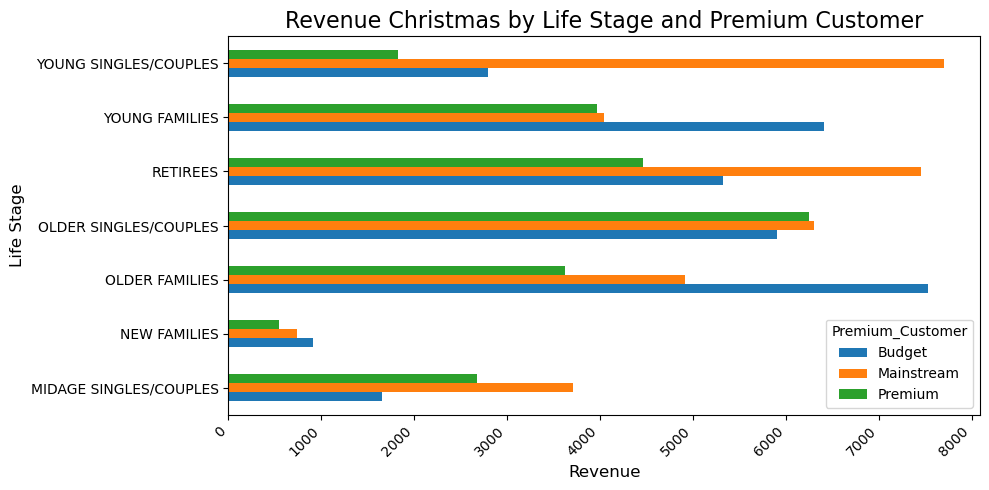

In [282]:
# Tạo bảng pivot chỉ có doanh thu
pivot_table_revenue_christmas = rev_qty_by_LT_PC_christmas.pivot_table(index='Life_Stage', values='revenue', aggfunc='sum')

# Vẽ biểu đồ cột cho doanh thu
pivot_table_revenue_christmas.plot(kind='barh', figsize=(10, 5))

# Cài đặt tiêu đề và nhãn cho biểu đồ
plt.title('Revenue Christmas by Life Stage and Premium Customer', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Life Stage', fontsize=12)

# Xoay nhãn của trục X nếu cần
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [286]:
rev_qty_by_LT_PC_christmas = sum_mean_revenue_qty_christmas('Packet_Size')
rev_qty_by_LT_PC_christmas

,Packet_Size,revenue,mean_revenue,total_qty
0,175g,22400.7,7.310933,5898
1,150g,13638.5,7.166842,3669
2,134g,7943.9,7.105456,2147
3,110g,7569.6,7.363424,1992
4,170g,6706.7,7.476812,1723
5,330g,6275.7,10.876430,1101
6,300g,5321.7,7.432542,1364
7,165g,4855.2,6.752712,1383
8,380g,3289.5,11.961818,531
9,270g,2787.6,8.849524,606


# Tổng hợp Insight 

1. Xu hướng doanh thu theo quý:

    Doanh thu và số lượng bán ra không có biến động lớn trong Q1, Q3, Q4, nhưng Q2 ghi nhận sự tăng trưởng đáng kể.

    Trong 2 tuần trước Giáng sinh, doanh thu tăng 11.44%, số lượng sản phẩm bán ra tăng 11.74% so với mức trung bình.

2. Hiệu suất thương hiệu & kích cỡ sản phẩm:

    Thương hiệu có doanh thu cao nhất: Kettle (8.71%), Doritos (8.15%), Smiths (8.05%), Pringles (7.92%).
    Kích cỡ bán chạy: Túi 175g chiếm 23.9%, túi 150g chiếm 15.4%, có doanh thu cao gấp 5 lần và 3 lần so với trung bình.

    Smiths có số lượng bán nhiều hơn Doritos 7.5%, nhưng doanh thu thấp hơn Doritos 7.1%.

    Top 20% cửa hàng đóng góp 37.71% tổng doanh thu toàn chuỗi.
3. Nhóm khách hàng trọng điểm:

    Nhóm mang lại doanh thu cao nhất: Budget Older Families (8.71%), Mainstream Young Singles/Couples (8.15%), Mainstream Retirees (8.05%).

    Nhóm chiếm số lượng khách hàng cao nhất: Mainstream Young Singles/Couples (11.13%), Mainstream Retirees (8.92%), Mainstream Older Singles/Couples (6.79%).

    Budget Older Families chỉ chiếm 6.44% tổng số khách hàng nhưng mang lại doanh thu cao nhất → nhóm tiềm năng cần khai thác thêm.

4. Hành vi mua sắm theo nhóm khách hàng, kích cỡ sản phẩm & thương hiệu:

   1. Mainstream Young Singles/Couples:
        Ưa chuộng: Túi 175g (23.9%), thương hiệu Kettle (18.56%).
        Khả năng mua cao hơn:Túi 270g cao hơn 27.67% so với nhóm khác, thương hiệu Tyrrells cao hơn 23%.
        Ít ưa chuộng:Túi 220g thấp hơn 55.35% so với nhóm khác, thương hiệu Burger Rings thấp hơn 55% so với nhóm khác.
   
    2. Budget Older Families: 
        Ưa chuộng: Túi 175g (25.12%), thương hiệu Smiths (13.31%).
        Khả năng mua cao hơn: Túi 180g cao hơn 34.02% so với nhóm khác, thương hiệu NCC cao hơn 37%.
        Ít ưa chuộng:Túi 134g thấp hơn 10.72% so với nhóm khác, thương hiệu Tostitos thấp hơn 17% so với các nhóm khác.

   
   3.  Mainstream Retirees:
        Ưa chuộng: Túi 175g (24.59%), thương hiệu Kettle (15.86%).
        Khả năng mua cao hơn:Túi 250g cao hơn 13.72% so với nhóm khác, thương hiệu Grain Waves cao hơn 7%.
        Ít ưa chuộng:Túi 190g thấp hơn 12.63% so với nhóm khác, thương hiệu French Fries thấp hơn 18% so với các nhóm khác.

# Giải pháp

1. Tăng Doanh Thu Quý 2

Giải pháp: Tận dụng đợt tăng trưởng vào dịp Giáng Sinh bằng cách tăng cường khuyến mãi và các chương trình giảm giá đặc biệt trong 2 tuần trước Giáng Sinh.

Chiến lược cụ thể: Cung cấp ưu đãi combo cho các sản phẩm bán chạy như túi 175g và 150g. Tạo các gói quà tặng với sản phẩm thuộc các kích cỡ phổ biến, thu hút khách hàng trong dịp lễ.

2. Tối Ưu Thương Hiệu & Sản Phẩm

Giải pháp: Tăng cường quảng bá các thương hiệu và kích cỡ sản phẩm bán chạy.

Chiến lược cụ thể: Thương hiệu Kettle và Doritos có doanh thu cao, nên cần đẩy mạnh các chiến dịch truyền thông và quảng cáo nhằm nâng cao nhận diện thương hiệu. Kích cỡ sản phẩm: Đặc biệt quảng bá túi 175g và 150g, do đây là các kích cỡ phổ biến và doanh thu cao. Tổ chức các sự kiện hoặc chương trình trưng bày sản phẩm tại các cửa hàng lớn để thúc đẩy sự chú ý đến những sản phẩm này.

3. Khai Thác Nhóm Khách Hàng Tiềm Năng

Giải pháp: Tập trung vào các nhóm khách hàng mang lại doanh thu cao và xây dựng chiến lược riêng biệt cho từng nhóm.

Chiến lược cụ thể: Budget Older Families: Mặc dù nhóm này chiếm ít khách hàng nhưng lại đóng góp doanh thu cao. Tạo các chương trình khuyến mãi và giảm giá nhắm đến nhóm khách hàng này, chẳng hạn như giảm giá cho các sản phẩm của Smiths và các kích cỡ túi phù hợp như 175g và 180g.
Mainstream Young Singles/Couples và Mainstream Retirees: Tăng cường quảng cáo trực tuyến và qua các kênh truyền thông xã hội, tập trung vào những sản phẩm yêu thích của nhóm này, như Kettle cho Mainstream Young Singles/Couples và Smiths cho Budget Older Families.

4. Tùy Chỉnh Mua Sắm Theo Kích Cỡ & Thương Hiệu

Giải pháp: Thúc đẩy các sản phẩm yêu thích của từng nhóm khách hàng thông qua các chương trình đặc biệt.

Chiến lược cụ thể:Mainstream Young Singles/Couples: Nhóm này ưa chuộng túi 175g và thương hiệu Kettle, vì vậy nên tăng cường các chiến dịch quảng bá túi 270g và Tyrrells cho nhóm này để khuyến khích họ thử sản phẩm mới. Đồng thời giảm giá mạnh cho các kích cỡ 175g và quảng bá túi 270g để tận dụng sự ưa chuộng này.
Budget Older Families: Nhóm này ưa chuộng túi 175g và sản phẩm từ thương hiệu Smiths, vì vậy cần tổ chức các chiến dịch khuyến mãi tập trung vào sản phẩm Smiths và túi 175g. Đồng thời quảng cáo các kích cỡ khác như túi 180g để khai thác khả năng mua cao hơn so với các nhóm khác.

5. Tối Ưu Các Cửa Hàng Bán Lẻ

Giải pháp: Tập trung vào các cửa hàng đóng góp doanh thu cao nhất, tối ưu hóa chiến lược bán hàng tại các cửa hàng này.

Chiến lược cụ thể:Đưa ra các chương trình ưu đãi và khuyến mãi đặc biệt tại các cửa hàng top 20%, các cửa hàng này cần được ưu tiên hàng hóa và chương trình trưng bày đặc biệt để duy trì sự chú ý và gia tăng doanh thu.Tổ chức các sự kiện tại cửa hàng hoặc thử nghiệm các sản phẩm mới tại các cửa hàng bán lẻ hàng đầu để thu hút thêm khách hàng.